# Requirements

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Loading Data

In [2]:
for file in os.listdir(r'tennis_data/tennis_csv'):
    df_name = file.split('.')[0]
    globals()[df_name] = pd.read_csv(r'tennis_data/tennis_csv/' + file)

# Season

In [ ]:
df_season.head(5)

In [ ]:
df_season[['season_id', 'name']].drop_duplicates(keep='first')['name'].duplicated().sum()
df_season[df_season['name'] == 'ITF Japan 21A, Women Singles 2023']

In [ ]:
df_season[df_season['season_id'] == 55244]
df_season[~df_season.duplicated(subset=['name', 'season_id'], keep=False)]

In [ ]:
df_season[df_season.duplicated(subset=['name'], keep=False)]

### Season DataFrame
this DataFrame contains name and year of season for each match_id
1. `match_id`
    * numbers for uniquely identifying each match
    * not any duplicate
    * not any Null

2. `season_id`
    * numbers for uniquely identifying each season
    * we have totally **53 unique season_id**
    * not any Null
3. `name`
    * uniquely identifying each season names
    * we have a <span style="color:red">bug</span> : "55244" and "55428" used for same season name
    * we have totally **52 unique season_id**
    * not any Null
4. `year`
    * this column includes year of the seasons that all of them is **2023**


# Statistics

In [5]:
df_statistics['statistic_name'].unique()

array(['aces', 'double_faults', 'first_serve', 'second_serve',
       'first_serve_points', 'second_serve_points',
       'service_games_played', 'break_points_saved', 'total',
       'service_points_won', 'receiver_points_won', 'max_points_in_a_row',
       'total_won', 'service_games_won', 'max_games_in_a_row',
       'first_serve_return_points', 'second_serve_return_points',
       'return_games_played', 'break_points_converted', 'tiebreaks'],
      dtype=object)

In [ ]:
df_statistics[(df_statistics['statistic_category_name'] == 'service') & (df_statistics['match_id'] == 11703525)]
df_statistics['period'].unique()
df_statistics['statistic_name']
df_statistics[(df_statistics['match_id'] == 11674105)]
df_statistics[(df_statistics['match_id'] == 11674105)]
df_statistics

### Statistics
statistics data frame appears to be a structured representation of tennis match statistics, organized into columns with specific information
1. `match_id`
    * numbers for uniquely identifying each match
    * there is **209 uniqe id**
2. `period`
    * there are **4** values here that refer to number of sets :
        * 1ST is first set
        * 2ND is secend set 
        * 3RD is thired set 
        * ALL is sum of all sets
    * not any Null value
3. `statistic_category_name`
    * this column contain category of events that we show statistical reports in next columns
    * this catagory include: service, points, games, return, miscellaneous
    * not any Null value
4. `statistic_name`
    * there is name of event that we show statistical reports in next columns
    * there is **20 uniqe id**
    * not any Null value
5.  `home_stat`
    * there is status of home player on Respective event include numbers and percents
    * not any Null value
6. `away_stat`
    * there is status of home player on Respective event include numbers and percents
    * not any Null value
7. `compare_code`
    * Here are three situations to show the comparison result
        * 3 : equal situation
        * 2 : away player has greater value
        * 1 : home player has greater value
    * not any Null value
8. `statistic_type`
    * this column show that the event has positive point or negative
    * not any Null value
9. `value_type`
    * this column Determines event or team statistics
    * not any Null value
10. `home_value`
    * 

# Time

In [ ]:
df_time.head()

In [ ]:
df_time['current_period_start_timestamp'].isna().sum()

### Time
Time data frame apears time spend in each game and it's starting time.
all of columns are in secend

1. `match_id`
    * numbers for uniquely identifying each match
    * there is **764 uniqe id**
2. `period_1` 
    * shows time spend in first game
    * it has **444 NaN values**
    * min of this column is 1039 secends
    * max of this column is 5180 secends
    * mean of this column is 2547.937500 secends
3. `period_2`
    * shows time spend in secend game
    * it has **445 NaN values**
    * min of this column is 455 secends
    * max of this column is 5423 secends
    * mean of this column is 2706.194357 secends
4. `period_3`
    * shows time spend in third game
    * it has **657 NaN values**
    * min of this column is 671 secends
    * max of this column is 5180 secends
    * mean of this column is 2327.364486 secends
5. `period_4`
    * shows time spend in 4th game
    * all of this column is NaN
6. `period_5`
    * shows time spend in 5th game
    * all of this column is NaN
7. `current_period_start_timestamp`
    * shows starting time
    * it has **435 NaN values**


In [5]:
def statistics_cleaner(df):
    df['home_total'].fillna(0, inplace=True)
    df['away_total'].fillna(0, inplace=True)    
    df['home_total'] = df['home_total'].astype('int64')
    df['away_total'] = df['away_total'].astype('int64')
    df['period'] = df['period'].astype('category')
    df['statistic_category_name'] = df['statistic_category_name'].astype('category')
    df['statistic_type'] = df['statistic_type'].astype('category')
    df['value_type'] = df['value_type'].astype('category')

In [7]:
statistics_cleaner(df_statistics)

(12263, 13)

----

----

## 7. What is the average number of aces per match?

In [4]:
(df_statistics[df_statistics['statistic_name'] == 'aces']
    .groupby('match_id').agg({'home_stat':'mean',
                                'away_stat':'mean',
                                'home_value':'mean',
                                'away_value':'mean' }))

,home_stat,away_stat,home_value,away_value
match_id,,,,
11674074,33.666667,73.333333,0.666667,1.333333
11674103,174.333333,73.333333,3.333333,1.333333
11674105,4666.500000,4163.750000,9.000000,8.000000
11674110,140.666667,250.666667,2.666667,4.666667
11674111,146.666667,211.000000,2.666667,4.000000
...,...,...,...,...
11703444,104.000000,36.666667,2.000000,0.666667
11703445,33.666667,70.333333,0.666667,1.333333
11703470,107.000000,73.333333,2.000000,1.333333


In [5]:
aces = df_statistics[df_statistics['statistic_name'] == 'aces'][['match_id', 'home_stat', 'away_stat', 'home_value','away_value']]
aces

,match_id,home_stat,away_stat,home_value,away_value
0,11674074,1,2,1,2
20,11674074,0,2,0,2
37,11674074,1,0,1,0
53,11674103,5,2,5,2
73,11674103,2,2,2,2
...,...,...,...,...,...
12175,11703524,3,0,3,0
12192,11703524,1,0,1,0
12209,11703525,1,1,1,1
12229,11703525,1,0,1,0


In [ ]:
all_aces = df_statistics[(df_statistics['statistic_name'] == 'aces') & (df_statistics['period'] == 'ALL')]
all_aces['home_stat'], all_aces['away_stat'] = all_aces['home_stat'].astype(int), all_aces['away_stat'].astype(int)
all_aces['aces_sum'] = all_aces[['home_stat', 'away_stat']].sum(axis=1)
aces_df = all_aces[['match_id', 'aces_sum']]
aces_df

In [27]:
all_aces['aces_sum'].mean()

4.009569377990431

## 8. Is there a difference in the number of double faults based on gender?

In [81]:
df_statistics.head(2)

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
1,11674074,ALL,service,double_faults,1,3,2,negative,event,1,3,NaN,NaN


In [ ]:
duble_foults_df = (df_statistics[['match_id'
                                 , 'home_stat', 'away_stat'
                                 , 'home_value', 'away_value']]
                                    [(df_statistics['statistic_name'] == 'double_faults') & 
                                     (df_statistics['period'] == 'ALL')]).astype(int).reset_index()
duble_foults_df.drop(columns=['index'], inplace=True)
duble_foults_df['sum_stat'] = duble_foults_df[['home_stat', 'away_stat']].sum(axis=1)
duble_foults_df

In [68]:
home_team_gender = df_home_team[['match_id', 'gender']].drop_duplicates()
away_team_gender = df_away_team[['match_id', 'gender']].drop_duplicates()

In [80]:
dfoults_gender = pd.merge(duble_foults_df,
                          home_team_gender,
                          on='match_id', how='inner')
dfoults_gender = pd.merge(dfoults_gender,
                          away_team_gender,
                          suffixes= ('_home', '_away'),
                          on='match_id', how='inner')
dfoults_gender.drop_duplicates(subset=['match_id'], inplace=True)
dfoults_gender.reset_index(drop=True, inplace=True)
dfoults_gender

,match_id,home_stat,away_stat,home_value,away_value,sum_stat,gender_home,gender_away
0,11674074,1,3,1,3,4,F,F
1,11674103,1,4,1,4,5,M,M
2,11674105,1,1,1,1,2,M,M
3,11674110,3,2,3,2,5,M,M
4,11674111,3,3,3,3,6,M,M
...,...,...,...,...,...,...,...,...
204,11703444,2,4,2,4,6,NaN,NaN
205,11703445,2,0,2,0,2,M,M
206,11703470,4,0,4,0,4,F,F
207,11703524,4,4,4,4,8,M,NaN


In [101]:
dfoults_gender_home = dfoults_gender.groupby('gender_home', as_index=False).agg({'home_stat' : 'sum'})
dfoults_gender_away = dfoults_gender.groupby('gender_away', as_index=False).agg({'away_stat' : 'sum'})
dfoult_final_df = dfoults_gender_home.join(dfoults_gender_away)
dfoult_final_df['total_stat'] = dfoult_final_df['away_stat'] + dfoult_final_df['home_stat']
dfoult_final_df

,gender_home,home_stat,gender_away,away_stat,total_stat
0,F,361,F,342,703
1,M,186,M,127,313


<Axes: >

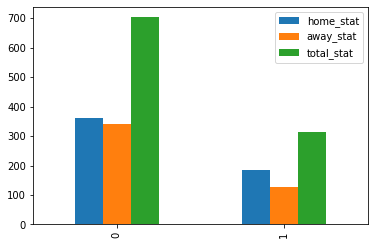

In [102]:
dfoult_final_df.plot(kind='bar')

## 9. Which player has won the most tournaments in a single month?

In [112]:
match_win_mounth = df_event[['match_id', 'winner_code', 'start_datetime']]
match_win_mounth['start_datetime'] = pd.to_datetime(match_win_mounth['start_datetime'], unit='s')
match_win_mounth['mounth'] = match_win_mounth['start_datetime'].dt.month
match_win_mounth.drop(columns=['start_datetime'], inplace=True)
match_win_mounth

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3136\2868825605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_win_mounth['start_datetime'] = pd.to_datetime(match_win_mounth['start_datetime'], unit='s')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3136\2868825605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_win_mounth['mounth'] = match_win_mounth['start_datetime'].dt.month
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3136\2868825605.py:4: SettingWithCopyWarning: 
A value is trying to be

,match_id,winner_code,mounth
0,11673958,2.0,9
1,11673962,1.0,10
2,11673963,1.0,9
3,11673993,2.0,10
4,11674000,2.0,9
...,...,...,...
759,11703444,1.0,10
760,11703445,1.0,10
761,11703470,1.0,10
762,11703524,1.0,10


In [119]:
match_h_player = df_home_team[['match_id', 'name']].drop_duplicates()
match_a_player = df_away_team[['match_id', 'name']].drop_duplicates()

In [154]:
win_h_player = pd.merge(match_win_mounth.loc[match_win_mounth['winner_code'] == 1], match_h_player)
win_h_player.drop_duplicates(subset = ['match_id'], keep = 'first', inplace = True)
win_h_player.dropna(inplace = True)
win_a_player = pd.merge(match_win_mounth.loc[match_win_mounth['winner_code'] == 2], match_a_player)
win_a_player.drop_duplicates(subset = ['match_id'], keep = 'first', inplace = True)
win_a_player.dropna(inplace = True)
winners_name = pd.concat([win_h_player, win_a_player], axis = 0, ignore_index = True)

In [201]:
winners_name

,match_id,winner_code,mounth,name
0,11673962,1.0,10,Tirante T.
1,11673963,1.0,9,Heide G.
2,11674008,1.0,9,Shelbayh A.
3,11674032,1.0,10,Machač T.
4,11674034,1.0,9,Draper J.
...,...,...,...,...
497,11702232,2.0,10,Aguilar Cardozo J.
498,11702238,2.0,10,Derdoy F.
499,11702243,2.0,10,Mouilleron Salvo M.
500,11702248,2.0,10,Noel M.


In [188]:
win_counts = (winners_name.groupby('mounth').
 agg({'name': 'value_counts'}).
 rename(columns={'name' : 'win_counts'}).
 sort_values('win_counts', ascending=False))

In [195]:
win_counts.loc[win_counts['win_counts'] == win_counts['win_counts'].max()]

win_counts
mounth name                   
10     Kalina V.             3
       Milushev P.           3
       Panaras A.            3

<span style="color:red">bug</span> : "Beijing, China" has two ids in df_tournomets :  (121516, 121644)

In [220]:
tourn = df_tournament[['match_id', 'tournament_id']]

In [233]:
winners_name_tourn = pd.merge(winners_name, tourn)
win_counts_tourn = (winners_name_tourn.groupby(['mounth', 'tournament_id']).
 agg({'name': 'value_counts'}).
 rename(columns={'name' : 'win_counts'}).
 sort_values('win_counts', ascending=False))
win_counts_tourn

win_counts
mounth tournament_id name                       
10     121868        Panaras A.                3
       121843        Milushev P.               3
       121868        Kalina V.                 3
       121871        Fery A.                   2
                     Karlovskiy E.             2
...                                          ...
       121846        Rachapudi P.              1
                     Nikolenko T.              1
                     Martellenghi E.           1
                     Drozd M.                  1
       121898        Noel M.                   1

[385 rows x 1 columns]

In [235]:
win_counts_tourn.loc[win_counts_tourn['win_counts'] == win_counts_tourn['win_counts'].max()]

win_counts
mounth tournament_id name                   
10     121868        Panaras A.            3
       121843        Milushev P.           3
       121868        Kalina V.             3

## 10. Is there a correlation between a player's height and their ranking?

In [263]:
height_rank = (pd.concat([df_away_team[['name', 'height', 'current_rank']],
                df_home_team[['name', 'height', 'current_rank']]]))
height_rank.dropna(subset='current_rank', inplace=True)
height_rank_mean = height_rank.fillna(value=height_rank['height'].mean())

In [269]:
height_rank.corr(method='pearson')

,height,current_rank
height,1.000000,0.033658
current_rank,0.033658,1.000000


In [270]:
height_rank_mean.corr(method='pearson')

,height,current_rank
height,1.000000,0.024227
current_rank,0.024227,1.000000


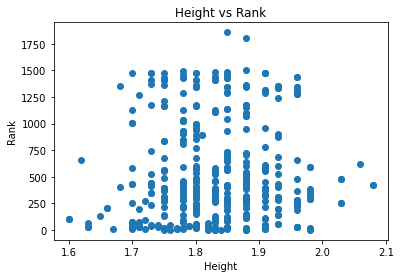

In [272]:
plt.scatter(height_rank['height'], height_rank['current_rank'])
plt.xlabel('Height')
plt.ylabel('Rank')
plt.title('Height vs Rank')
plt.show()